# Obtaining adversarials
## Attack methods: CW, BIM, FGSM

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pwd

'D:\\guided-retraining\\notebooks'

In [4]:
cd ../utils/

D:\guided-retraining\utils


In [5]:
import utils_guided_retraining2 as utils

2.5.0
keras
2.5.0


In [6]:
from importlib import reload  
utils = reload(utils)

2.5.0
keras
2.5.0


In [7]:
dataset = 'fashion'

In [9]:
x_train,y_train = utils.get_data(dataset,"Train",True)
x_val,y_val = utils.get_data(dataset,"Val",True)
x_test,y_test = utils.get_data(dataset,"Test",True)

D:/guided-retraining/data/fashion/x_train.npy
x_set len:  48999
D:/guided-retraining/data/fashion/y_train.npy
y_set len:  48999
D:/guided-retraining/data/fashion/x_val.npy
x_set len:  14000
D:/guided-retraining/data/fashion/y_val.npy
y_set len:  14000
D:/guided-retraining/data/fashion/x_test.npy
x_set len:  7001
D:/guided-retraining/data/fashion/y_test.npy
y_set len:  7001


In [10]:
model_dir = "D:/guided-retraining/models/model_fashion_2/"
model = utils.My_model(dataset,True, model_dir)

Model loaded correctly


In [11]:
model.evaluate(x_test,y_test)

219/219 [==============================] - 4s 14ms/step - loss: 0.2254 - accuracy: 0.9190


[0.2253975123167038, 0.9190115928649902]

In [12]:
y_test_labels = np.argmax(y_test,axis=1)
print(y_test_labels[:10])

[2 2 4 6 8 1 6 7 6 8]


In [13]:
y_train_labels = np.argmax(y_train,axis=1)
print(y_train_labels[:10])

[1 2 2 6 5 3 5 2 0 2]


In [14]:
x_train.shape[1:3]

(28, 28)

In [15]:
img_width,img_height  = model.sizes
print(img_width,img_height)

28 28


In [16]:
loading_cw = False
loading_bim = False
loading_fgsm = False

In [17]:
n_advs = 6999

In [19]:
see_images = True

## Adversarial methods

In [20]:
def see_x_image(x,y):
    '''# (48,48,1) show image, y - (43,)
    '''
    plt.figure()
    
    plt.imshow((x.reshape((img_width,img_height))*255).astype("uint8"))
    plt.title(str(np.argmax(y)))
    plt.axis("off")


In [22]:
pip install foolbox

  Using cached foolbox-3.3.3-py3-none-any.whl (1.7 MB)

  Using cached eagerpy-0.30.0-py3-none-any.whl (31 kB)

In [24]:
import foolbox as fb
import tensorflow.keras.backend as K

In [25]:
epsilons =[0.01,0.1]
epsilons =[0.05]

In [20]:
#pip install foolbox --upgrade

In [21]:
#from keras.utils import np_utils
# Change to  tf.keras.utils.to_categorical(y_train, num_classes)

### Creating adversarial set from training set

In [26]:
fmodel = fb.TensorFlowModel(model.model,bounds=(0,1))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [27]:

n_each_atack = int(n_advs/3)
print(n_each_atack)

2333


In [28]:
# Create n random numbers to get inputs from a set
n = n_advs
different_idxs_train = np.random.choice(len(x_train), n, replace=False)
print(len(different_idxs_train))
print(different_idxs_train[:10])

6999
[ 5368 29839  8578 10357 41441 16506  7642 34182 19770 16673]


In [29]:
# Create n random numbers to get inputs from a set
n = n_advs
different_idxs_test = np.random.choice(len(x_test), n, replace=False)
print(len(different_idxs_test))
print(different_idxs_test[:10])

6999
[6386 3130 5711 1709 2275 1703  243  518   16 4868]


In [30]:
type(different_idxs_train)

numpy.ndarray

In [31]:
idxs_cw_train = different_idxs_train[:n_each_atack]
idxs_bim_train = different_idxs_train[n_each_atack:2*n_each_atack]
idxs_fgsm_train = different_idxs_train[2*n_each_atack:]
print(len(idxs_cw_train))
print(len(idxs_bim_train))
print(len(idxs_fgsm_train))

2333
2333
2333


In [32]:
idxs_cw_test = different_idxs_test[:n_each_atack]
idxs_bim_test = different_idxs_test[n_each_atack:2*n_each_atack]
idxs_fgsm_test = different_idxs_test[2*n_each_atack:]
print(len(idxs_cw_test))
print(len(idxs_bim_test))
print(len(idxs_fgsm_test))

2333
2333
2333


In [33]:
print(idxs_cw_train[:10])
print(idxs_cw_test[:10])

[ 5368 29839  8578 10357 41441 16506  7642 34182 19770 16673]
[6386 3130 5711 1709 2275 1703  243  518   16 4868]


In [34]:
#loading = True

In [39]:

if (loading_cw):
    print("Loading...")
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_cw_train.npy"
    idxs_cw_train = np.load(save_dir)
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_bim_train.npy"
    idxs_bim_train = np.load(save_dir)
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_fgsm_train.npy"
    idxs_fgsm_train = np.load(save_dir)

In [40]:
if (loading_cw):
    print("Loading...")
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_cw_test.npy"
    idxs_cw_test = np.load(save_dir)
    print(idxs_cw_test.shape)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_bim_test.npy"
    idxs_bim_test = np.load(save_dir)
    print(idxs_bim_test.shape)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_fgsm_test.npy"
    idxs_fgsm_test = np.load(save_dir)
    print(idxs_fgsm_test.shape)
    

In [37]:
idxs_cw_train[:10]

array([ 5368, 29839,  8578, 10357, 41441, 16506,  7642, 34182, 19770,
       16673])

In [38]:
dataset

'fashion'

In [42]:
if (not loading_cw):
    #print("saving")
    #save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_advs.npy"

    #with open(save_dir, 'wb') as f:
    #    np.save(f, different_idxs)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_cw_train)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_bim_train)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_fgsm_train)

In [43]:
if (not loading_cw):
    #print("saving")
    #save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_advs.npy"

    #with open(save_dir, 'wb') as f:
    #    np.save(f, different_idxs)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_cw_test)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_bim_test)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/idxs_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_fgsm_test)

In [44]:
def get_from_original_set_adv(idx_list,x_set,y_set_labels):
    new_images = np.zeros((len(idx_list),img_width,img_height,1))
    new_labels = np.zeros((len(idx_list),))
    j=0
    for idx in idx_list:
        print(idx)
        print("---",j)
        new_images[j] = x_set[int(idx)]
        new_labels[j] = y_set_labels[int(idx)]
        print("label",new_labels[j])
        j +=1
    return new_images , new_labels

In [45]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_cw_train,x_train,y_train_labels)

5368
--- 0
label 4.0
29839
--- 1
label 9.0
8578
--- 2
label 2.0
10357
--- 3
label 1.0
41441
--- 4
label 5.0
16506
--- 5
label 9.0
7642
--- 6
label 1.0
34182
--- 7
label 0.0
19770
--- 8
label 7.0
16673
--- 9
label 7.0
27982
--- 10
label 6.0
39555
--- 11
label 0.0
38802
--- 12
label 5.0
11344
--- 13
label 0.0
26160
--- 14
label 5.0
171
--- 15
label 4.0
40729
--- 16
label 7.0
20002
--- 17
label 8.0
2770
--- 18
label 7.0
21325
--- 19
label 5.0
8329
--- 20
label 0.0
12111
--- 21
label 3.0
34817
--- 22
label 7.0
42575
--- 23
label 8.0
28886
--- 24
label 1.0
39210
--- 25
label 7.0
4757
--- 26
label 9.0
44982
--- 27
label 8.0
23751
--- 28
label 3.0
42148
--- 29
label 8.0
13443
--- 30
label 0.0
34369
--- 31
label 4.0
36719
--- 32
label 6.0
36255
--- 33
label 8.0
4936
--- 34
label 1.0
11291
--- 35
label 2.0
33539
--- 36
label 2.0
38510
--- 37
label 9.0
26472
--- 38
label 8.0
11619
--- 39
label 3.0
36148
--- 40
label 8.0
43979
--- 41
label 4.0
18233
--- 42
label 1.0
26881
--- 43
label 3.0
14971
-

label 7.0
15550
--- 448
label 8.0
14446
--- 449
label 4.0
23459
--- 450
label 8.0
34495
--- 451
label 5.0
40544
--- 452
label 2.0
24272
--- 453
label 2.0
36530
--- 454
label 0.0
25251
--- 455
label 1.0
18337
--- 456
label 6.0
13636
--- 457
label 9.0
16172
--- 458
label 9.0
12646
--- 459
label 0.0
14417
--- 460
label 2.0
41502
--- 461
label 3.0
11266
--- 462
label 9.0
20224
--- 463
label 5.0
39771
--- 464
label 9.0
28330
--- 465
label 9.0
22050
--- 466
label 7.0
12037
--- 467
label 3.0
20075
--- 468
label 1.0
24443
--- 469
label 5.0
16370
--- 470
label 6.0
52
--- 471
label 9.0
48732
--- 472
label 8.0
9938
--- 473
label 9.0
650
--- 474
label 0.0
18001
--- 475
label 8.0
20154
--- 476
label 5.0
37916
--- 477
label 1.0
1597
--- 478
label 4.0
11025
--- 479
label 0.0
23463
--- 480
label 4.0
2666
--- 481
label 8.0
39627
--- 482
label 3.0
4476
--- 483
label 9.0
29627
--- 484
label 4.0
25623
--- 485
label 4.0
44754
--- 486
label 6.0
12106
--- 487
label 3.0
21146
--- 488
label 4.0
38078
--- 489
l

label 6.0
30568
--- 802
label 5.0
12278
--- 803
label 1.0
48203
--- 804
label 0.0
18847
--- 805
label 1.0
11140
--- 806
label 7.0
26481
--- 807
label 6.0
25327
--- 808
label 9.0
3429
--- 809
label 3.0
4257
--- 810
label 3.0
37663
--- 811
label 1.0
24476
--- 812
label 9.0
44051
--- 813
label 1.0
25528
--- 814
label 7.0
14463
--- 815
label 3.0
45879
--- 816
label 7.0
9436
--- 817
label 2.0
22729
--- 818
label 8.0
5534
--- 819
label 1.0
39418
--- 820
label 1.0
28756
--- 821
label 6.0
23262
--- 822
label 2.0
44035
--- 823
label 5.0
33052
--- 824
label 5.0
35011
--- 825
label 1.0
28076
--- 826
label 1.0
44528
--- 827
label 4.0
16586
--- 828
label 3.0
70
--- 829
label 1.0
41973
--- 830
label 0.0
31069
--- 831
label 3.0
11642
--- 832
label 0.0
43899
--- 833
label 8.0
23244
--- 834
label 0.0
9477
--- 835
label 6.0
20300
--- 836
label 4.0
21011
--- 837
label 4.0
40225
--- 838
label 0.0
6686
--- 839
label 7.0
44993
--- 840
label 6.0
19666
--- 841
label 0.0
17421
--- 842
label 2.0
28888
--- 843
l

--- 1179
label 7.0
46140
--- 1180
label 4.0
33145
--- 1181
label 7.0
26301
--- 1182
label 3.0
20380
--- 1183
label 0.0
12382
--- 1184
label 6.0
4637
--- 1185
label 1.0
6017
--- 1186
label 6.0
8550
--- 1187
label 0.0
14309
--- 1188
label 7.0
32003
--- 1189
label 2.0
46747
--- 1190
label 1.0
3276
--- 1191
label 8.0
46828
--- 1192
label 0.0
27987
--- 1193
label 1.0
6156
--- 1194
label 9.0
18250
--- 1195
label 9.0
27589
--- 1196
label 8.0
15557
--- 1197
label 1.0
25618
--- 1198
label 5.0
40535
--- 1199
label 5.0
40814
--- 1200
label 9.0
866
--- 1201
label 2.0
36808
--- 1202
label 0.0
11331
--- 1203
label 4.0
33532
--- 1204
label 1.0
23818
--- 1205
label 1.0
16423
--- 1206
label 0.0
17030
--- 1207
label 1.0
37963
--- 1208
label 5.0
25734
--- 1209
label 6.0
44448
--- 1210
label 0.0
29692
--- 1211
label 6.0
41199
--- 1212
label 7.0
35806
--- 1213
label 1.0
48084
--- 1214
label 0.0
42907
--- 1215
label 0.0
24142
--- 1216
label 2.0
13151
--- 1217
label 8.0
35057
--- 1218
label 3.0
8094
--- 1219

label 3.0
16301
--- 1519
label 3.0
15746
--- 1520
label 2.0
38823
--- 1521
label 6.0
21037
--- 1522
label 7.0
32971
--- 1523
label 9.0
4633
--- 1524
label 7.0
14019
--- 1525
label 2.0
21348
--- 1526
label 9.0
46505
--- 1527
label 5.0
24103
--- 1528
label 0.0
39547
--- 1529
label 4.0
15988
--- 1530
label 9.0
21441
--- 1531
label 5.0
7576
--- 1532
label 4.0
44307
--- 1533
label 9.0
19073
--- 1534
label 6.0
824
--- 1535
label 3.0
21499
--- 1536
label 3.0
47090
--- 1537
label 7.0
7788
--- 1538
label 5.0
14242
--- 1539
label 6.0
32447
--- 1540
label 2.0
33248
--- 1541
label 0.0
6250
--- 1542
label 8.0
48371
--- 1543
label 6.0
27277
--- 1544
label 9.0
26428
--- 1545
label 3.0
30612
--- 1546
label 1.0
20429
--- 1547
label 6.0
18234
--- 1548
label 9.0
46889
--- 1549
label 3.0
1592
--- 1550
label 1.0
35425
--- 1551
label 2.0
29495
--- 1552
label 4.0
45830
--- 1553
label 2.0
21750
--- 1554
label 0.0
28830
--- 1555
label 5.0
13908
--- 1556
label 5.0
18189
--- 1557
label 5.0
7683
--- 1558
label 4.

33000
--- 1856
label 3.0
13090
--- 1857
label 0.0
45372
--- 1858
label 8.0
11885
--- 1859
label 2.0
21896
--- 1860
label 1.0
21800
--- 1861
label 5.0
11627
--- 1862
label 9.0
46168
--- 1863
label 7.0
8923
--- 1864
label 6.0
7883
--- 1865
label 6.0
9334
--- 1866
label 2.0
32190
--- 1867
label 8.0
42512
--- 1868
label 6.0
8080
--- 1869
label 5.0
34313
--- 1870
label 1.0
32614
--- 1871
label 4.0
48827
--- 1872
label 7.0
43250
--- 1873
label 8.0
467
--- 1874
label 4.0
25290
--- 1875
label 4.0
27189
--- 1876
label 1.0
14370
--- 1877
label 8.0
36929
--- 1878
label 2.0
38662
--- 1879
label 3.0
21768
--- 1880
label 1.0
9289
--- 1881
label 8.0
11214
--- 1882
label 4.0
44340
--- 1883
label 9.0
8680
--- 1884
label 5.0
15580
--- 1885
label 2.0
13996
--- 1886
label 7.0
45112
--- 1887
label 5.0
38321
--- 1888
label 0.0
33391
--- 1889
label 0.0
530
--- 1890
label 6.0
18409
--- 1891
label 4.0
13289
--- 1892
label 9.0
38368
--- 1893
label 6.0
19961
--- 1894
label 7.0
16397
--- 1895
label 4.0
27094
--- 

--- 2241
label 9.0
10798
--- 2242
label 2.0
21576
--- 2243
label 7.0
4026
--- 2244
label 6.0
48948
--- 2245
label 7.0
29557
--- 2246
label 3.0
18713
--- 2247
label 6.0
44128
--- 2248
label 5.0
41396
--- 2249
label 2.0
39138
--- 2250
label 3.0
5080
--- 2251
label 0.0
47347
--- 2252
label 7.0
7740
--- 2253
label 8.0
4207
--- 2254
label 4.0
30253
--- 2255
label 3.0
12173
--- 2256
label 7.0
31917
--- 2257
label 7.0
15393
--- 2258
label 6.0
30809
--- 2259
label 0.0
36802
--- 2260
label 0.0
28058
--- 2261
label 3.0
42146
--- 2262
label 6.0
35631
--- 2263
label 4.0
9677
--- 2264
label 2.0
9254
--- 2265
label 3.0
27082
--- 2266
label 9.0
41123
--- 2267
label 0.0
7023
--- 2268
label 0.0
15811
--- 2269
label 3.0
18416
--- 2270
label 1.0
2022
--- 2271
label 1.0
25026
--- 2272
label 5.0
44618
--- 2273
label 6.0
47722
--- 2274
label 5.0
46572
--- 2275
label 1.0
39337
--- 2276
label 3.0
44073
--- 2277
label 6.0
29659
--- 2278
label 1.0
39107
--- 2279
label 4.0
38387
--- 2280
label 2.0
22753
--- 2281

In [46]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_cw_test,x_test,y_test_labels)

6386
--- 0
label 2.0
3130
--- 1
label 0.0
5711
--- 2
label 6.0
1709
--- 3
label 2.0
2275
--- 4
label 6.0
1703
--- 5
label 1.0
243
--- 6
label 2.0
518
--- 7
label 6.0
16
--- 8
label 8.0
4868
--- 9
label 3.0
716
--- 10
label 1.0
4914
--- 11
label 2.0
2600
--- 12
label 1.0
1789
--- 13
label 9.0
4090
--- 14
label 3.0
3071
--- 15
label 7.0
1582
--- 16
label 8.0
3626
--- 17
label 8.0
6463
--- 18
label 3.0
5176
--- 19
label 1.0
4144
--- 20
label 7.0
4577
--- 21
label 3.0
4827
--- 22
label 2.0
1690
--- 23
label 7.0
4929
--- 24
label 8.0
63
--- 25
label 9.0
1232
--- 26
label 5.0
2584
--- 27
label 6.0
6640
--- 28
label 5.0
2661
--- 29
label 7.0
6740
--- 30
label 2.0
2261
--- 31
label 5.0
5450
--- 32
label 7.0
4752
--- 33
label 4.0
4974
--- 34
label 5.0
1240
--- 35
label 6.0
857
--- 36
label 1.0
5742
--- 37
label 3.0
1743
--- 38
label 0.0
1340
--- 39
label 0.0
3652
--- 40
label 8.0
4084
--- 41
label 9.0
3721
--- 42
label 3.0
4987
--- 43
label 2.0
418
--- 44
label 1.0
3235
--- 45
label 8.0
3413
--

--- 432
label 2.0
5924
--- 433
label 7.0
6484
--- 434
label 1.0
5207
--- 435
label 2.0
1848
--- 436
label 9.0
6865
--- 437
label 2.0
3798
--- 438
label 2.0
2002
--- 439
label 1.0
1440
--- 440
label 3.0
207
--- 441
label 1.0
2182
--- 442
label 1.0
2570
--- 443
label 2.0
2800
--- 444
label 5.0
4853
--- 445
label 7.0
4380
--- 446
label 7.0
595
--- 447
label 2.0
5959
--- 448
label 4.0
5615
--- 449
label 5.0
364
--- 450
label 3.0
167
--- 451
label 2.0
2932
--- 452
label 1.0
3133
--- 453
label 2.0
1336
--- 454
label 9.0
914
--- 455
label 3.0
3489
--- 456
label 5.0
529
--- 457
label 5.0
5357
--- 458
label 0.0
4095
--- 459
label 6.0
6286
--- 460
label 2.0
1463
--- 461
label 4.0
2211
--- 462
label 8.0
5638
--- 463
label 7.0
3540
--- 464
label 5.0
413
--- 465
label 5.0
5473
--- 466
label 4.0
6430
--- 467
label 8.0
6718
--- 468
label 7.0
2473
--- 469
label 6.0
3213
--- 470
label 9.0
3069
--- 471
label 7.0
5827
--- 472
label 1.0
4825
--- 473
label 5.0
2691
--- 474
label 6.0
2488
--- 475
label 6.0


--- 893
label 6.0
1075
--- 894
label 5.0
4112
--- 895
label 5.0
149
--- 896
label 9.0
5691
--- 897
label 4.0
1224
--- 898
label 9.0
3350
--- 899
label 9.0
3371
--- 900
label 0.0
2957
--- 901
label 3.0
4754
--- 902
label 0.0
6829
--- 903
label 3.0
2390
--- 904
label 2.0
4963
--- 905
label 5.0
5226
--- 906
label 1.0
4533
--- 907
label 6.0
1941
--- 908
label 2.0
5746
--- 909
label 1.0
4255
--- 910
label 6.0
1442
--- 911
label 8.0
3161
--- 912
label 2.0
2542
--- 913
label 9.0
5515
--- 914
label 8.0
3107
--- 915
label 4.0
599
--- 916
label 7.0
1160
--- 917
label 4.0
6121
--- 918
label 5.0
3285
--- 919
label 5.0
4347
--- 920
label 6.0
2802
--- 921
label 9.0
780
--- 922
label 8.0
4062
--- 923
label 7.0
4921
--- 924
label 1.0
1267
--- 925
label 2.0
6806
--- 926
label 4.0
6011
--- 927
label 9.0
863
--- 928
label 8.0
275
--- 929
label 1.0
3845
--- 930
label 1.0
5598
--- 931
label 9.0
6586
--- 932
label 0.0
6571
--- 933
label 2.0
5775
--- 934
label 2.0
3814
--- 935
label 8.0
4145
--- 936
label 8.

--- 1307
label 8.0
2389
--- 1308
label 3.0
2365
--- 1309
label 1.0
3870
--- 1310
label 6.0
3834
--- 1311
label 3.0
818
--- 1312
label 3.0
1942
--- 1313
label 1.0
790
--- 1314
label 3.0
1048
--- 1315
label 2.0
2745
--- 1316
label 4.0
651
--- 1317
label 1.0
6623
--- 1318
label 8.0
4075
--- 1319
label 7.0
4671
--- 1320
label 4.0
828
--- 1321
label 6.0
4511
--- 1322
label 4.0
2017
--- 1323
label 3.0
1484
--- 1324
label 2.0
601
--- 1325
label 3.0
3170
--- 1326
label 6.0
5260
--- 1327
label 9.0
3099
--- 1328
label 7.0
427
--- 1329
label 3.0
2437
--- 1330
label 9.0
78
--- 1331
label 3.0
1947
--- 1332
label 8.0
435
--- 1333
label 1.0
1109
--- 1334
label 7.0
6398
--- 1335
label 4.0
6999
--- 1336
label 3.0
2679
--- 1337
label 5.0
1241
--- 1338
label 3.0
2794
--- 1339
label 6.0
3112
--- 1340
label 4.0
6985
--- 1341
label 6.0
1668
--- 1342
label 4.0
689
--- 1343
label 6.0
3445
--- 1344
label 1.0
6154
--- 1345
label 3.0
1704
--- 1346
label 9.0
3556
--- 1347
label 0.0
4565
--- 1348
label 9.0
3999
--

label 0.0
2755
--- 1670
label 4.0
5038
--- 1671
label 4.0
3475
--- 1672
label 5.0
848
--- 1673
label 0.0
6048
--- 1674
label 9.0
3526
--- 1675
label 6.0
4804
--- 1676
label 5.0
447
--- 1677
label 6.0
396
--- 1678
label 0.0
6579
--- 1679
label 8.0
3525
--- 1680
label 6.0
2373
--- 1681
label 1.0
6185
--- 1682
label 5.0
4204
--- 1683
label 6.0
4717
--- 1684
label 1.0
4970
--- 1685
label 2.0
449
--- 1686
label 4.0
2546
--- 1687
label 1.0
1863
--- 1688
label 5.0
6553
--- 1689
label 4.0
212
--- 1690
label 8.0
2401
--- 1691
label 9.0
3899
--- 1692
label 1.0
6780
--- 1693
label 4.0
179
--- 1694
label 7.0
3538
--- 1695
label 8.0
1997
--- 1696
label 3.0
5298
--- 1697
label 6.0
1711
--- 1698
label 6.0
5426
--- 1699
label 4.0
1725
--- 1700
label 5.0
5567
--- 1701
label 4.0
6396
--- 1702
label 9.0
1058
--- 1703
label 6.0
4202
--- 1704
label 2.0
6308
--- 1705
label 7.0
4971
--- 1706
label 4.0
840
--- 1707
label 7.0
3367
--- 1708
label 0.0
2179
--- 1709
label 8.0
6010
--- 1710
label 8.0
1206
--- 1711

label 1.0
5050
--- 2028
label 2.0
6373
--- 2029
label 8.0
3585
--- 2030
label 4.0
2623
--- 2031
label 2.0
6449
--- 2032
label 5.0
4244
--- 2033
label 0.0
6359
--- 2034
label 5.0
6251
--- 2035
label 4.0
4358
--- 2036
label 9.0
5464
--- 2037
label 1.0
1265
--- 2038
label 9.0
2502
--- 2039
label 1.0
2762
--- 2040
label 2.0
402
--- 2041
label 4.0
4608
--- 2042
label 9.0
6763
--- 2043
label 9.0
6725
--- 2044
label 3.0
6978
--- 2045
label 2.0
4774
--- 2046
label 9.0
2109
--- 2047
label 9.0
5139
--- 2048
label 6.0
5507
--- 2049
label 9.0
3913
--- 2050
label 6.0
640
--- 2051
label 4.0
3005
--- 2052
label 7.0
3485
--- 2053
label 4.0
3537
--- 2054
label 9.0
4235
--- 2055
label 0.0
2819
--- 2056
label 4.0
2021
--- 2057
label 6.0
4118
--- 2058
label 7.0
510
--- 2059
label 2.0
623
--- 2060
label 6.0
2455
--- 2061
label 5.0
954
--- 2062
label 6.0
2175
--- 2063
label 3.0
19
--- 2064
label 3.0
2310
--- 2065
label 2.0
2127
--- 2066
label 0.0
4916
--- 2067
label 8.0
1799
--- 2068
label 8.0
4578
--- 2069

In [47]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [48]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [49]:
attack_CW = fb.attacks.L2BasicIterativeAttack()


In [50]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_CW(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:31.674915


In [51]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_CW(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:21.536311


In [52]:
#fb.attacks.p
# new train set
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [53]:
#fb.attacks.p
# new test set
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [55]:
labels_to_adv_onehot_train =tf.keras.utils.to_categorical(labels_to_adv_train, model.num_classes)

In [56]:
labels_to_adv_onehot_test =tf.keras.utils.to_categorical(labels_to_adv_test, model.num_classes)

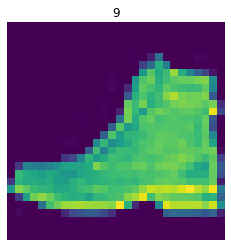

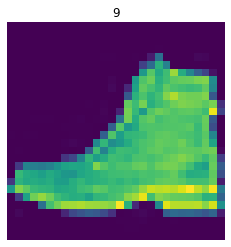

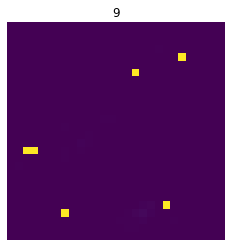

In [60]:
if(see_images):
    i = 29839
    see_x_image(x_train[i],y_train[i])
    see_x_image(numpy_raw_train[1],labels_to_adv_onehot_train[1])
    see_x_image(numpy_raw_train[1]-x_train[i],labels_to_adv_onehot_train[1])

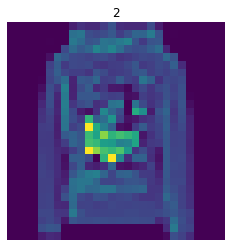

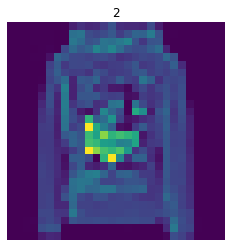

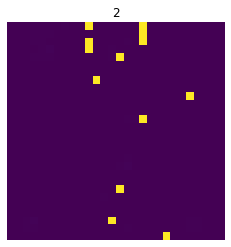

In [61]:
if(see_images):
    see_x_image(x_test[6386],y_test[6386])
    see_x_image(numpy_raw_test[0],labels_to_adv_onehot_test[0])
    see_x_image(numpy_raw_test[0]-x_test[6386],labels_to_adv_onehot_test[0])

In [62]:
labels_to_adv_onehot_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [63]:
loading_cw 

False

In [115]:
loading_cw = True
if (loading_cw):
    print("loading...")
    numpy_raw_train_cw = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_cw_train.npy")
    labels_to_adv_onehot_train_cw = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_cw_train.npy")
    
    numpy_raw_test_cw = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_cw_test.npy")
    labels_to_adv_onehot_test_cw = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_cw_test.npy")
    print("finished")
    

loading...
finished


In [116]:
#model.evaluate(numpy_raw_train,labels_to_adv_onehot_train)
model.evaluate(numpy_raw_train_cw,labels_to_adv_onehot_train_cw)

73/73 [==============================] - 1s 10ms/step - loss: 0.2251 - accuracy: 0.9138


[0.22508253157138824, 0.9138448238372803]

In [117]:
#model.evaluate(numpy_raw_test,labels_to_adv_onehot_test)
model.evaluate(numpy_raw_test_cw,labels_to_adv_onehot_test_cw)

73/73 [==============================] - 1s 10ms/step - loss: 0.2883 - accuracy: 0.8933


[0.2882513701915741, 0.8932704925537109]

In [67]:
if(not loading_cw):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [68]:
if (not loading_cw):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

### BIM

In [57]:
#loading_bim =True

In [69]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_bim_train,x_train,y_train_labels)

22413
--- 0
label 9.0
33781
--- 1
label 0.0
30978
--- 2
label 4.0
23708
--- 3
label 4.0
22404
--- 4
label 1.0
38062
--- 5
label 4.0
46705
--- 6
label 7.0
29147
--- 7
label 7.0
30606
--- 8
label 6.0
39523
--- 9
label 0.0
15814
--- 10
label 9.0
31467
--- 11
label 6.0
43135
--- 12
label 3.0
33087
--- 13
label 5.0
11065
--- 14
label 0.0
3234
--- 15
label 9.0
16126
--- 16
label 6.0
46996
--- 17
label 6.0
29891
--- 18
label 2.0
1093
--- 19
label 1.0
48508
--- 20
label 5.0
21895
--- 21
label 2.0
16461
--- 22
label 8.0
40178
--- 23
label 3.0
553
--- 24
label 3.0
16553
--- 25
label 9.0
25165
--- 26
label 0.0
14844
--- 27
label 6.0
46689
--- 28
label 9.0
32039
--- 29
label 3.0
44963
--- 30
label 7.0
34130
--- 31
label 6.0
11757
--- 32
label 4.0
5845
--- 33
label 7.0
4048
--- 34
label 4.0
6720
--- 35
label 0.0
44895
--- 36
label 7.0
22440
--- 37
label 3.0
32626
--- 38
label 6.0
6531
--- 39
label 4.0
23006
--- 40
label 8.0
30023
--- 41
label 2.0
20752
--- 42
label 5.0
2122
--- 43
label 4.0
9038
--

label 8.0
39240
--- 379
label 5.0
14095
--- 380
label 6.0
22165
--- 381
label 7.0
7439
--- 382
label 0.0
1367
--- 383
label 3.0
24558
--- 384
label 9.0
35692
--- 385
label 8.0
17395
--- 386
label 3.0
756
--- 387
label 4.0
46864
--- 388
label 7.0
43077
--- 389
label 1.0
23368
--- 390
label 1.0
9488
--- 391
label 9.0
7813
--- 392
label 2.0
31352
--- 393
label 8.0
19663
--- 394
label 5.0
23877
--- 395
label 2.0
14191
--- 396
label 9.0
7501
--- 397
label 7.0
27610
--- 398
label 5.0
33101
--- 399
label 2.0
19631
--- 400
label 9.0
35766
--- 401
label 6.0
17802
--- 402
label 7.0
34430
--- 403
label 1.0
39046
--- 404
label 0.0
5357
--- 405
label 9.0
43838
--- 406
label 2.0
33508
--- 407
label 6.0
27049
--- 408
label 8.0
34330
--- 409
label 4.0
22669
--- 410
label 5.0
24365
--- 411
label 8.0
39580
--- 412
label 8.0
24643
--- 413
label 9.0
21246
--- 414
label 9.0
33627
--- 415
label 5.0
37096
--- 416
label 1.0
3080
--- 417
label 3.0
47800
--- 418
label 0.0
25814
--- 419
label 4.0
18248
--- 420
l

label 4.0
42307
--- 736
label 8.0
3466
--- 737
label 3.0
30996
--- 738
label 9.0
34970
--- 739
label 5.0
16717
--- 740
label 5.0
45903
--- 741
label 5.0
16916
--- 742
label 2.0
21225
--- 743
label 2.0
30551
--- 744
label 1.0
35047
--- 745
label 5.0
31849
--- 746
label 9.0
42249
--- 747
label 4.0
2412
--- 748
label 9.0
34958
--- 749
label 2.0
14278
--- 750
label 8.0
46207
--- 751
label 7.0
18465
--- 752
label 9.0
21613
--- 753
label 3.0
17732
--- 754
label 1.0
36904
--- 755
label 6.0
11890
--- 756
label 6.0
3357
--- 757
label 3.0
29455
--- 758
label 0.0
45722
--- 759
label 2.0
32266
--- 760
label 2.0
4008
--- 761
label 4.0
20011
--- 762
label 3.0
4358
--- 763
label 7.0
24625
--- 764
label 2.0
6376
--- 765
label 1.0
14548
--- 766
label 1.0
18204
--- 767
label 1.0
20078
--- 768
label 8.0
8977
--- 769
label 6.0
23805
--- 770
label 4.0
41716
--- 771
label 3.0
10876
--- 772
label 6.0
41418
--- 773
label 5.0
45345
--- 774
label 3.0
6044
--- 775
label 3.0
20467
--- 776
label 8.0
9315
--- 777
l

label 0.0
20069
--- 1083
label 6.0
28464
--- 1084
label 6.0
18041
--- 1085
label 6.0
4107
--- 1086
label 6.0
45560
--- 1087
label 8.0
28496
--- 1088
label 6.0
90
--- 1089
label 2.0
5999
--- 1090
label 5.0
5120
--- 1091
label 1.0
17334
--- 1092
label 7.0
3939
--- 1093
label 1.0
46032
--- 1094
label 5.0
15449
--- 1095
label 5.0
11858
--- 1096
label 7.0
27929
--- 1097
label 2.0
36343
--- 1098
label 2.0
44364
--- 1099
label 6.0
8957
--- 1100
label 9.0
45800
--- 1101
label 5.0
22301
--- 1102
label 1.0
4973
--- 1103
label 2.0
27491
--- 1104
label 5.0
35080
--- 1105
label 0.0
48642
--- 1106
label 8.0
42085
--- 1107
label 9.0
36972
--- 1108
label 2.0
9277
--- 1109
label 3.0
23761
--- 1110
label 5.0
16190
--- 1111
label 6.0
40240
--- 1112
label 4.0
44868
--- 1113
label 0.0
10927
--- 1114
label 4.0
46582
--- 1115
label 7.0
5556
--- 1116
label 1.0
23273
--- 1117
label 9.0
9744
--- 1118
label 9.0
25453
--- 1119
label 6.0
19006
--- 1120
label 0.0
29604
--- 1121
label 6.0
3715
--- 1122
label 3.0
959

--- 1456
label 6.0
23258
--- 1457
label 0.0
11723
--- 1458
label 1.0
30587
--- 1459
label 7.0
3064
--- 1460
label 1.0
43883
--- 1461
label 9.0
44940
--- 1462
label 2.0
22930
--- 1463
label 9.0
45419
--- 1464
label 3.0
15505
--- 1465
label 0.0
34681
--- 1466
label 6.0
13163
--- 1467
label 8.0
48616
--- 1468
label 9.0
25250
--- 1469
label 8.0
10120
--- 1470
label 4.0
37174
--- 1471
label 5.0
721
--- 1472
label 9.0
7821
--- 1473
label 2.0
15459
--- 1474
label 9.0
16972
--- 1475
label 5.0
17515
--- 1476
label 6.0
16500
--- 1477
label 6.0
45977
--- 1478
label 1.0
34106
--- 1479
label 6.0
11209
--- 1480
label 6.0
7386
--- 1481
label 3.0
9235
--- 1482
label 7.0
10666
--- 1483
label 0.0
26154
--- 1484
label 4.0
45808
--- 1485
label 6.0
39176
--- 1486
label 9.0
29348
--- 1487
label 6.0
980
--- 1488
label 0.0
11484
--- 1489
label 4.0
46934
--- 1490
label 7.0
23068
--- 1491
label 7.0
11942
--- 1492
label 1.0
22209
--- 1493
label 4.0
44558
--- 1494
label 3.0
43706
--- 1495
label 2.0
35728
--- 1496

--- 1873
label 8.0
10396
--- 1874
label 0.0
10898
--- 1875
label 0.0
46435
--- 1876
label 6.0
21110
--- 1877
label 5.0
5562
--- 1878
label 4.0
8412
--- 1879
label 4.0
14202
--- 1880
label 0.0
19168
--- 1881
label 7.0
26679
--- 1882
label 7.0
44815
--- 1883
label 6.0
38377
--- 1884
label 2.0
1368
--- 1885
label 3.0
47156
--- 1886
label 4.0
17691
--- 1887
label 7.0
14853
--- 1888
label 9.0
24882
--- 1889
label 3.0
35415
--- 1890
label 6.0
12480
--- 1891
label 1.0
11819
--- 1892
label 0.0
30855
--- 1893
label 1.0
6114
--- 1894
label 5.0
13644
--- 1895
label 0.0
40102
--- 1896
label 8.0
15595
--- 1897
label 8.0
16204
--- 1898
label 6.0
7847
--- 1899
label 8.0
24635
--- 1900
label 6.0
12047
--- 1901
label 0.0
14149
--- 1902
label 5.0
41219
--- 1903
label 2.0
29617
--- 1904
label 6.0
36361
--- 1905
label 5.0
46352
--- 1906
label 4.0
41033
--- 1907
label 2.0
48106
--- 1908
label 0.0
38819
--- 1909
label 3.0
31527
--- 1910
label 0.0
33544
--- 1911
label 4.0
21691
--- 1912
label 9.0
25139
--- 1

label 5.0
12809
--- 2212
label 7.0
33994
--- 2213
label 2.0
7447
--- 2214
label 9.0
24145
--- 2215
label 3.0
43646
--- 2216
label 3.0
15271
--- 2217
label 1.0
47460
--- 2218
label 7.0
37066
--- 2219
label 4.0
8747
--- 2220
label 8.0
27446
--- 2221
label 3.0
24337
--- 2222
label 7.0
25596
--- 2223
label 0.0
34658
--- 2224
label 0.0
32449
--- 2225
label 7.0
33529
--- 2226
label 1.0
33700
--- 2227
label 4.0
37793
--- 2228
label 9.0
43232
--- 2229
label 0.0
35801
--- 2230
label 3.0
820
--- 2231
label 2.0
2364
--- 2232
label 4.0
47168
--- 2233
label 3.0
11395
--- 2234
label 7.0
24347
--- 2235
label 7.0
44065
--- 2236
label 1.0
12389
--- 2237
label 5.0
4906
--- 2238
label 0.0
29112
--- 2239
label 7.0
9540
--- 2240
label 8.0
48710
--- 2241
label 0.0
9224
--- 2242
label 5.0
30731
--- 2243
label 4.0
30696
--- 2244
label 2.0
5278
--- 2245
label 0.0
41155
--- 2246
label 2.0
12975
--- 2247
label 4.0
12245
--- 2248
label 3.0
680
--- 2249
label 2.0
2957
--- 2250
label 9.0
21347
--- 2251
label 6.0
31

In [70]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_bim_test,x_test,y_test_labels)

1931
--- 0
label 7.0
3978
--- 1
label 2.0
2490
--- 2
label 3.0
3955
--- 3
label 9.0
2848
--- 4
label 1.0
2250
--- 5
label 4.0
6663
--- 6
label 4.0
5437
--- 7
label 5.0
468
--- 8
label 0.0
5634
--- 9
label 4.0
610
--- 10
label 8.0
4110
--- 11
label 9.0
6731
--- 12
label 6.0
1284
--- 13
label 5.0
5960
--- 14
label 2.0
5007
--- 15
label 5.0
6292
--- 16
label 4.0
4650
--- 17
label 4.0
582
--- 18
label 0.0
6667
--- 19
label 3.0
1727
--- 20
label 9.0
6059
--- 21
label 4.0
6949
--- 22
label 7.0
6350
--- 23
label 4.0
142
--- 24
label 9.0
2790
--- 25
label 4.0
475
--- 26
label 5.0
301
--- 27
label 2.0
6242
--- 28
label 6.0
2832
--- 29
label 4.0
1525
--- 30
label 4.0
6739
--- 31
label 1.0
4069
--- 32
label 8.0
942
--- 33
label 8.0
4908
--- 34
label 6.0
5331
--- 35
label 7.0
4033
--- 36
label 8.0
180
--- 37
label 2.0
3649
--- 38
label 1.0
5069
--- 39
label 4.0
6329
--- 40
label 0.0
3490
--- 41
label 7.0
2258
--- 42
label 9.0
6294
--- 43
label 0.0
431
--- 44
label 1.0
4184
--- 45
label 8.0
618
---

--- 390
label 5.0
3974
--- 391
label 3.0
2435
--- 392
label 3.0
5835
--- 393
label 5.0
3792
--- 394
label 0.0
6902
--- 395
label 2.0
1624
--- 396
label 8.0
2333
--- 397
label 5.0
5543
--- 398
label 7.0
4174
--- 399
label 5.0
2053
--- 400
label 6.0
3282
--- 401
label 7.0
1530
--- 402
label 9.0
4670
--- 403
label 3.0
3650
--- 404
label 1.0
2162
--- 405
label 5.0
2882
--- 406
label 6.0
4237
--- 407
label 8.0
5259
--- 408
label 0.0
3562
--- 409
label 5.0
6434
--- 410
label 3.0
6026
--- 411
label 4.0
4768
--- 412
label 9.0
2697
--- 413
label 7.0
1173
--- 414
label 8.0
3127
--- 415
label 1.0
1996
--- 416
label 7.0
2260
--- 417
label 1.0
894
--- 418
label 9.0
3237
--- 419
label 5.0
3238
--- 420
label 3.0
1412
--- 421
label 3.0
4197
--- 422
label 4.0
5025
--- 423
label 1.0
1737
--- 424
label 6.0
5644
--- 425
label 4.0
1748
--- 426
label 3.0
1561
--- 427
label 0.0
2269
--- 428
label 1.0
655
--- 429
label 2.0
5581
--- 430
label 1.0
2582
--- 431
label 0.0
2917
--- 432
label 1.0
5110
--- 433
label

1924
--- 856
label 6.0
28
--- 857
label 5.0
3052
--- 858
label 4.0
3452
--- 859
label 8.0
864
--- 860
label 1.0
3346
--- 861
label 5.0
500
--- 862
label 1.0
3938
--- 863
label 6.0
3781
--- 864
label 5.0
292
--- 865
label 6.0
6247
--- 866
label 7.0
5620
--- 867
label 2.0
4025
--- 868
label 8.0
4574
--- 869
label 4.0
1685
--- 870
label 4.0
2199
--- 871
label 0.0
2465
--- 872
label 4.0
6330
--- 873
label 8.0
5845
--- 874
label 2.0
968
--- 875
label 4.0
2281
--- 876
label 1.0
3847
--- 877
label 3.0
700
--- 878
label 8.0
6600
--- 879
label 5.0
3731
--- 880
label 1.0
3821
--- 881
label 9.0
2851
--- 882
label 1.0
3630
--- 883
label 8.0
1229
--- 884
label 7.0
4550
--- 885
label 7.0
5954
--- 886
label 8.0
3833
--- 887
label 8.0
3659
--- 888
label 2.0
2682
--- 889
label 9.0
2856
--- 890
label 4.0
4856
--- 891
label 1.0
4365
--- 892
label 0.0
2667
--- 893
label 1.0
1790
--- 894
label 2.0
6288
--- 895
label 0.0
3623
--- 896
label 2.0
4471
--- 897
label 6.0
5086
--- 898
label 7.0
3636
--- 899
label

label 7.0
1606
--- 1210
label 4.0
215
--- 1211
label 5.0
54
--- 1212
label 9.0
5767
--- 1213
label 3.0
1390
--- 1214
label 4.0
5138
--- 1215
label 7.0
5648
--- 1216
label 1.0
2956
--- 1217
label 7.0
5220
--- 1218
label 6.0
5805
--- 1219
label 8.0
913
--- 1220
label 7.0
3604
--- 1221
label 5.0
210
--- 1222
label 0.0
4317
--- 1223
label 5.0
3202
--- 1224
label 6.0
3714
--- 1225
label 5.0
3555
--- 1226
label 0.0
6781
--- 1227
label 0.0
1588
--- 1228
label 7.0
5549
--- 1229
label 3.0
3995
--- 1230
label 9.0
1644
--- 1231
label 1.0
2178
--- 1232
label 0.0
3025
--- 1233
label 7.0
165
--- 1234
label 4.0
6684
--- 1235
label 6.0
1776
--- 1236
label 5.0
663
--- 1237
label 3.0
638
--- 1238
label 9.0
3889
--- 1239
label 1.0
1504
--- 1240
label 2.0
3357
--- 1241
label 1.0
4028
--- 1242
label 2.0
2689
--- 1243
label 3.0
191
--- 1244
label 2.0
557
--- 1245
label 6.0
2999
--- 1246
label 0.0
2388
--- 1247
label 7.0
4617
--- 1248
label 7.0
266
--- 1249
label 6.0
4408
--- 1250
label 0.0
2485
--- 1251
lab

label 8.0
3977
--- 1557
label 9.0
2438
--- 1558
label 5.0
1560
--- 1559
label 8.0
1184
--- 1560
label 9.0
1615
--- 1561
label 1.0
2413
--- 1562
label 6.0
5346
--- 1563
label 4.0
133
--- 1564
label 4.0
3364
--- 1565
label 2.0
5685
--- 1566
label 2.0
2433
--- 1567
label 3.0
835
--- 1568
label 0.0
5329
--- 1569
label 7.0
2431
--- 1570
label 6.0
6495
--- 1571
label 9.0
4050
--- 1572
label 0.0
972
--- 1573
label 4.0
4160
--- 1574
label 9.0
3951
--- 1575
label 8.0
1681
--- 1576
label 2.0
3569
--- 1577
label 3.0
650
--- 1578
label 3.0
183
--- 1579
label 1.0
1372
--- 1580
label 1.0
46
--- 1581
label 9.0
2397
--- 1582
label 8.0
5126
--- 1583
label 5.0
3674
--- 1584
label 9.0
6171
--- 1585
label 1.0
2262
--- 1586
label 2.0
6328
--- 1587
label 7.0
821
--- 1588
label 0.0
5590
--- 1589
label 5.0
2264
--- 1590
label 4.0
4534
--- 1591
label 7.0
6974
--- 1592
label 9.0
5486
--- 1593
label 0.0
6582
--- 1594
label 7.0
3280
--- 1595
label 0.0
424
--- 1596
label 2.0
4292
--- 1597
label 1.0
5524
--- 1598
l

label 2.0
330
--- 1921
label 7.0
4127
--- 1922
label 1.0
3961
--- 1923
label 2.0
4510
--- 1924
label 6.0
6240
--- 1925
label 8.0
6425
--- 1926
label 9.0
1054
--- 1927
label 3.0
858
--- 1928
label 3.0
1662
--- 1929
label 0.0
5112
--- 1930
label 9.0
5293
--- 1931
label 8.0
5603
--- 1932
label 8.0
597
--- 1933
label 7.0
3459
--- 1934
label 8.0
5595
--- 1935
label 4.0
1900
--- 1936
label 1.0
4453
--- 1937
label 4.0
2970
--- 1938
label 9.0
3514
--- 1939
label 6.0
2799
--- 1940
label 4.0
3015
--- 1941
label 1.0
3950
--- 1942
label 6.0
2161
--- 1943
label 5.0
5892
--- 1944
label 4.0
3310
--- 1945
label 5.0
1859
--- 1946
label 7.0
4665
--- 1947
label 3.0
2940
--- 1948
label 9.0
4473
--- 1949
label 0.0
791
--- 1950
label 5.0
4267
--- 1951
label 9.0
3402
--- 1952
label 2.0
5340
--- 1953
label 9.0
3749
--- 1954
label 1.0
4730
--- 1955
label 1.0
5914
--- 1956
label 2.0
4139
--- 1957
label 5.0
871
--- 1958
label 0.0
3221
--- 1959
label 3.0
5202
--- 1960
label 9.0
2681
--- 1961
label 2.0
6365
--- 19

label 4.0
1779
--- 2267
label 9.0
2992
--- 2268
label 4.0
763
--- 2269
label 5.0
5376
--- 2270
label 3.0
1462
--- 2271
label 0.0
6160
--- 2272
label 7.0
4585
--- 2273
label 4.0
6441
--- 2274
label 5.0
4918
--- 2275
label 8.0
65
--- 2276
label 0.0
1949
--- 2277
label 0.0
463
--- 2278
label 0.0
2647
--- 2279
label 4.0
5747
--- 2280
label 7.0
5205
--- 2281
label 2.0
6564
--- 2282
label 3.0
6296
--- 2283
label 4.0
2481
--- 2284
label 8.0
1413
--- 2285
label 0.0
3732
--- 2286
label 2.0
4057
--- 2287
label 0.0
4736
--- 2288
label 7.0
730
--- 2289
label 2.0
496
--- 2290
label 2.0
6077
--- 2291
label 3.0
4944
--- 2292
label 3.0
2897
--- 2293
label 1.0
4666
--- 2294
label 4.0
1575
--- 2295
label 8.0
2434
--- 2296
label 8.0
3362
--- 2297
label 1.0
2686
--- 2298
label 0.0
2134
--- 2299
label 7.0
4455
--- 2300
label 7.0
6825
--- 2301
label 7.0
2189
--- 2302
label 6.0
6973
--- 2303
label 5.0
1774
--- 2304
label 4.0
5439
--- 2305
label 7.0
6935
--- 2306
label 1.0
5027
--- 2307
label 7.0
2633
--- 230

In [71]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [72]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [73]:
attack_BIM = fb.attacks.L1BasicIterativeAttack()

In [74]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_BIM(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:30.050201


In [75]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_BIM(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:29.734758


In [77]:
print("-")

-


In [78]:
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [79]:
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [82]:
labels_to_adv_onehot_train =tf.keras.utils.to_categorical(labels_to_adv_train, model.num_classes)

In [83]:
labels_to_adv_onehot_test =tf.keras.utils.to_categorical(labels_to_adv_test, model.num_classes)

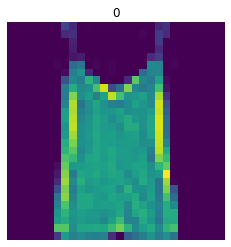

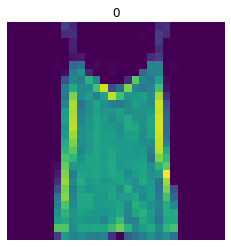

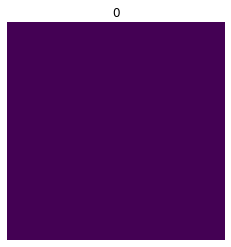

In [86]:
if(see_images):
    i = 33781
    see_x_image(x_train[i],y_train[i])
    see_x_image(numpy_raw_train[1],labels_to_adv_onehot_train[1])
    see_x_image(numpy_raw_train[1]-x_train[i],labels_to_adv_onehot_train[1])

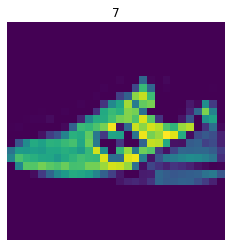

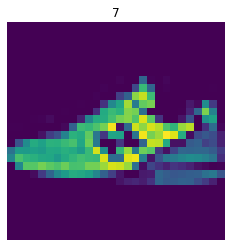

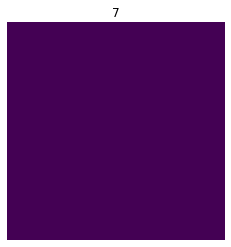

In [87]:
if(see_images):
    i=1931
    see_x_image(x_test[i],y_test[i])
    see_x_image(numpy_raw_test[0],labels_to_adv_onehot_test[0])
    see_x_image(numpy_raw_test[0]-x_test[i],labels_to_adv_onehot_test[0])

In [89]:
if(not loading_bim):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [90]:
if (not loading_bim):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

In [118]:
loading_bim = True
if (loading_bim):
    print("loading...")
    numpy_raw_train_bim = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_bim_train.npy")
    labels_to_adv_onehot_train_bim = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_bim_train.npy")
    
    numpy_raw_test_bim = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_bim_test.npy")
    labels_to_adv_onehot_test_bim = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_bim_test.npy")
    print("finished")

loading...
finished


In [119]:
#model.evaluate(numpy_raw_test,labels_to_adv_onehot_test)
model.evaluate(numpy_raw_test_bim,labels_to_adv_onehot_test_bim)

73/73 [==============================] - 1s 10ms/step - loss: 0.2138 - accuracy: 0.9254


[0.21378572285175323, 0.9254179000854492]

In [120]:
#model.evaluate(numpy_raw_train,labels_to_adv_onehot_train)
model.evaluate(numpy_raw_train_bim,labels_to_adv_onehot_train_bim)

73/73 [==============================] - 1s 10ms/step - loss: 0.1716 - accuracy: 0.9340


[0.1715930998325348, 0.9339905977249146]

### FGSM

In [95]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_fgsm_train,x_train,y_train_labels)

12860
--- 0
label 0.0
45603
--- 1
label 0.0
36716
--- 2
label 2.0
48622
--- 3
label 1.0
1952
--- 4
label 3.0
36913
--- 5
label 0.0
10590
--- 6
label 7.0
39112
--- 7
label 0.0
8522
--- 8
label 3.0
10540
--- 9
label 2.0
46149
--- 10
label 2.0
40753
--- 11
label 2.0
12526
--- 12
label 7.0
33063
--- 13
label 7.0
32040
--- 14
label 7.0
25783
--- 15
label 2.0
15018
--- 16
label 8.0
2098
--- 17
label 5.0
48823
--- 18
label 4.0
28183
--- 19
label 4.0
6218
--- 20
label 0.0
21707
--- 21
label 8.0
37097
--- 22
label 4.0
19101
--- 23
label 4.0
28939
--- 24
label 6.0
36686
--- 25
label 5.0
10624
--- 26
label 9.0
33669
--- 27
label 1.0
45732
--- 28
label 7.0
10612
--- 29
label 0.0
35162
--- 30
label 5.0
951
--- 31
label 7.0
4137
--- 32
label 3.0
16066
--- 33
label 0.0
35738
--- 34
label 8.0
44268
--- 35
label 6.0
12895
--- 36
label 1.0
44259
--- 37
label 3.0
7800
--- 38
label 5.0
37956
--- 39
label 2.0
14334
--- 40
label 0.0
9446
--- 41
label 9.0
35296
--- 42
label 7.0
28358
--- 43
label 2.0
3864
--

label 8.0
23520
--- 405
label 6.0
33188
--- 406
label 1.0
34471
--- 407
label 3.0
36709
--- 408
label 0.0
33933
--- 409
label 9.0
26671
--- 410
label 2.0
26710
--- 411
label 2.0
23221
--- 412
label 0.0
26197
--- 413
label 4.0
35075
--- 414
label 0.0
10066
--- 415
label 1.0
10693
--- 416
label 3.0
858
--- 417
label 3.0
1068
--- 418
label 2.0
9793
--- 419
label 0.0
44819
--- 420
label 6.0
16251
--- 421
label 9.0
16740
--- 422
label 0.0
48766
--- 423
label 4.0
44338
--- 424
label 4.0
7434
--- 425
label 0.0
11431
--- 426
label 1.0
3947
--- 427
label 4.0
27907
--- 428
label 8.0
34888
--- 429
label 6.0
30003
--- 430
label 7.0
46113
--- 431
label 0.0
5133
--- 432
label 3.0
30285
--- 433
label 6.0
27875
--- 434
label 8.0
390
--- 435
label 6.0
37352
--- 436
label 4.0
41691
--- 437
label 0.0
46034
--- 438
label 1.0
4592
--- 439
label 9.0
47573
--- 440
label 6.0
33369
--- 441
label 7.0
32957
--- 442
label 0.0
34914
--- 443
label 9.0
17601
--- 444
label 6.0
14235
--- 445
label 0.0
25559
--- 446
la

label 8.0
39456
--- 754
label 0.0
45775
--- 755
label 2.0
12627
--- 756
label 8.0
700
--- 757
label 6.0
14565
--- 758
label 4.0
21245
--- 759
label 9.0
12222
--- 760
label 7.0
4595
--- 761
label 3.0
10708
--- 762
label 6.0
41937
--- 763
label 8.0
29754
--- 764
label 3.0
43621
--- 765
label 5.0
23694
--- 766
label 7.0
10777
--- 767
label 1.0
7598
--- 768
label 0.0
17438
--- 769
label 5.0
5961
--- 770
label 2.0
25484
--- 771
label 7.0
43183
--- 772
label 5.0
39022
--- 773
label 1.0
5831
--- 774
label 4.0
34327
--- 775
label 4.0
8339
--- 776
label 5.0
12790
--- 777
label 8.0
17654
--- 778
label 8.0
11666
--- 779
label 8.0
13882
--- 780
label 7.0
957
--- 781
label 8.0
19389
--- 782
label 6.0
33704
--- 783
label 6.0
9661
--- 784
label 2.0
6366
--- 785
label 6.0
18621
--- 786
label 6.0
31302
--- 787
label 5.0
10495
--- 788
label 5.0
9819
--- 789
label 8.0
7690
--- 790
label 0.0
46922
--- 791
label 0.0
42506
--- 792
label 9.0
25085
--- 793
label 0.0
23541
--- 794
label 7.0
12923
--- 795
label

label 8.0
28002
--- 1135
label 5.0
12007
--- 1136
label 0.0
38459
--- 1137
label 8.0
5433
--- 1138
label 9.0
27849
--- 1139
label 6.0
47166
--- 1140
label 5.0
22091
--- 1141
label 2.0
34886
--- 1142
label 8.0
32004
--- 1143
label 2.0
39949
--- 1144
label 2.0
12326
--- 1145
label 3.0
23681
--- 1146
label 9.0
30345
--- 1147
label 1.0
6559
--- 1148
label 1.0
11797
--- 1149
label 5.0
25781
--- 1150
label 9.0
33150
--- 1151
label 0.0
30817
--- 1152
label 3.0
24821
--- 1153
label 1.0
4804
--- 1154
label 4.0
16950
--- 1155
label 5.0
47564
--- 1156
label 8.0
11387
--- 1157
label 6.0
28827
--- 1158
label 5.0
41906
--- 1159
label 1.0
23342
--- 1160
label 2.0
17476
--- 1161
label 2.0
44805
--- 1162
label 9.0
25571
--- 1163
label 5.0
26730
--- 1164
label 7.0
34602
--- 1165
label 2.0
47197
--- 1166
label 8.0
12943
--- 1167
label 4.0
24167
--- 1168
label 5.0
16772
--- 1169
label 8.0
28418
--- 1170
label 0.0
19290
--- 1171
label 5.0
18322
--- 1172
label 3.0
38199
--- 1173
label 8.0
35061
--- 1174
lab

label 4.0
14179
--- 1556
label 5.0
23735
--- 1557
label 3.0
45961
--- 1558
label 3.0
46286
--- 1559
label 3.0
30267
--- 1560
label 5.0
7970
--- 1561
label 6.0
11216
--- 1562
label 6.0
8788
--- 1563
label 2.0
38940
--- 1564
label 0.0
32073
--- 1565
label 2.0
15183
--- 1566
label 3.0
31656
--- 1567
label 3.0
25188
--- 1568
label 4.0
17187
--- 1569
label 5.0
10571
--- 1570
label 7.0
1462
--- 1571
label 1.0
38370
--- 1572
label 2.0
16088
--- 1573
label 6.0
12142
--- 1574
label 6.0
4539
--- 1575
label 1.0
36805
--- 1576
label 6.0
6742
--- 1577
label 6.0
22894
--- 1578
label 9.0
44042
--- 1579
label 0.0
36499
--- 1580
label 7.0
12772
--- 1581
label 2.0
1721
--- 1582
label 3.0
15757
--- 1583
label 8.0
45328
--- 1584
label 2.0
44371
--- 1585
label 7.0
47104
--- 1586
label 1.0
2100
--- 1587
label 8.0
11303
--- 1588
label 9.0
37755
--- 1589
label 7.0
30534
--- 1590
label 8.0
28190
--- 1591
label 4.0
37281
--- 1592
label 9.0
16786
--- 1593
label 3.0
15636
--- 1594
label 9.0
38829
--- 1595
label 8

label 1.0
42524
--- 1986
label 6.0
27254
--- 1987
label 8.0
18182
--- 1988
label 7.0
11740
--- 1989
label 6.0
28080
--- 1990
label 4.0
21635
--- 1991
label 2.0
25329
--- 1992
label 2.0
7035
--- 1993
label 9.0
37252
--- 1994
label 0.0
20802
--- 1995
label 9.0
19598
--- 1996
label 7.0
12372
--- 1997
label 5.0
39157
--- 1998
label 2.0
48935
--- 1999
label 2.0
12268
--- 2000
label 2.0
619
--- 2001
label 0.0
44457
--- 2002
label 8.0
41296
--- 2003
label 6.0
34909
--- 2004
label 1.0
31057
--- 2005
label 7.0
40008
--- 2006
label 6.0
9647
--- 2007
label 0.0
27124
--- 2008
label 9.0
25667
--- 2009
label 3.0
26664
--- 2010
label 9.0
1231
--- 2011
label 9.0
23331
--- 2012
label 5.0
19403
--- 2013
label 2.0
35192
--- 2014
label 5.0
46437
--- 2015
label 9.0
4881
--- 2016
label 7.0
22688
--- 2017
label 5.0
19524
--- 2018
label 9.0
40343
--- 2019
label 0.0
25027
--- 2020
label 3.0
38244
--- 2021
label 2.0
24596
--- 2022
label 6.0
40843
--- 2023
label 9.0
24095
--- 2024
label 3.0
2325
--- 2025
label 9

In [96]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_fgsm_test,x_test,y_test_labels)

5412
--- 0
label 2.0
2047
--- 1
label 8.0
5565
--- 2
label 0.0
1155
--- 3
label 7.0
3546
--- 4
label 1.0
5936
--- 5
label 6.0
539
--- 6
label 6.0
6476
--- 7
label 2.0
3427
--- 8
label 9.0
2463
--- 9
label 2.0
2284
--- 10
label 0.0
5749
--- 11
label 6.0
4887
--- 12
label 0.0
6634
--- 13
label 0.0
5825
--- 14
label 4.0
850
--- 15
label 4.0
3013
--- 16
label 8.0
6809
--- 17
label 8.0
5725
--- 18
label 3.0
4597
--- 19
label 8.0
3695
--- 20
label 0.0
632
--- 21
label 0.0
2009
--- 22
label 0.0
6479
--- 23
label 3.0
2141
--- 24
label 9.0
3381
--- 25
label 1.0
1378
--- 26
label 9.0
4589
--- 27
label 5.0
5447
--- 28
label 3.0
6755
--- 29
label 3.0
6161
--- 30
label 0.0
1102
--- 31
label 7.0
2818
--- 32
label 3.0
2319
--- 33
label 2.0
4201
--- 34
label 1.0
2678
--- 35
label 0.0
1081
--- 36
label 6.0
1452
--- 37
label 9.0
786
--- 38
label 2.0
2974
--- 39
label 7.0
5646
--- 40
label 1.0
2941
--- 41
label 7.0
6467
--- 42
label 3.0
2513
--- 43
label 7.0
3199
--- 44
label 1.0
5692
--- 45
label 4.0
21

label 8.0
2267
--- 380
label 2.0
4149
--- 381
label 9.0
1508
--- 382
label 5.0
4934
--- 383
label 8.0
6088
--- 384
label 3.0
3998
--- 385
label 4.0
4173
--- 386
label 7.0
6155
--- 387
label 7.0
2912
--- 388
label 7.0
6282
--- 389
label 3.0
5413
--- 390
label 3.0
2883
--- 391
label 0.0
2034
--- 392
label 6.0
5832
--- 393
label 4.0
701
--- 394
label 9.0
214
--- 395
label 3.0
1492
--- 396
label 1.0
2728
--- 397
label 2.0
4850
--- 398
label 4.0
2622
--- 399
label 2.0
4952
--- 400
label 2.0
2866
--- 401
label 9.0
1287
--- 402
label 2.0
838
--- 403
label 8.0
4018
--- 404
label 9.0
2644
--- 405
label 4.0
6036
--- 406
label 8.0
5091
--- 407
label 4.0
4646
--- 408
label 6.0
590
--- 409
label 2.0
3145
--- 410
label 1.0
1361
--- 411
label 5.0
624
--- 412
label 3.0
4384
--- 413
label 6.0
4257
--- 414
label 4.0
1497
--- 415
label 8.0
5054
--- 416
label 0.0
4458
--- 417
label 9.0
5783
--- 418
label 4.0
1422
--- 419
label 8.0
6414
--- 420
label 9.0
6931
--- 421
label 7.0
1392
--- 422
label 3.0
611
--

label 2.0
5991
--- 760
label 9.0
5115
--- 761
label 1.0
3289
--- 762
label 0.0
6218
--- 763
label 4.0
119
--- 764
label 3.0
53
--- 765
label 0.0
2729
--- 766
label 0.0
2593
--- 767
label 0.0
2160
--- 768
label 1.0
3314
--- 769
label 5.0
6125
--- 770
label 8.0
2558
--- 771
label 1.0
5807
--- 772
label 8.0
5582
--- 773
label 2.0
4337
--- 774
label 2.0
2773
--- 775
label 0.0
3686
--- 776
label 9.0
951
--- 777
label 3.0
3516
--- 778
label 2.0
6062
--- 779
label 8.0
2804
--- 780
label 5.0
5251
--- 781
label 8.0
2921
--- 782
label 4.0
3500
--- 783
label 5.0
274
--- 784
label 6.0
3990
--- 785
label 1.0
5514
--- 786
label 3.0
3082
--- 787
label 6.0
5525
--- 788
label 3.0
2604
--- 789
label 9.0
2316
--- 790
label 1.0
1405
--- 791
label 3.0
5531
--- 792
label 2.0
5337
--- 793
label 1.0
5122
--- 794
label 2.0
4168
--- 795
label 9.0
820
--- 796
label 8.0
57
--- 797
label 6.0
5389
--- 798
label 0.0
5800
--- 799
label 4.0
1803
--- 800
label 1.0
940
--- 801
label 5.0
6533
--- 802
label 3.0
925
--- 80

--- 1154
label 1.0
5865
--- 1155
label 7.0
2624
--- 1156
label 2.0
352
--- 1157
label 5.0
340
--- 1158
label 9.0
4909
--- 1159
label 4.0
1037
--- 1160
label 7.0
2348
--- 1161
label 8.0
4930
--- 1162
label 2.0
1410
--- 1163
label 0.0
1350
--- 1164
label 8.0
6269
--- 1165
label 2.0
2861
--- 1166
label 3.0
1758
--- 1167
label 7.0
2936
--- 1168
label 3.0
620
--- 1169
label 0.0
3372
--- 1170
label 7.0
2202
--- 1171
label 1.0
6204
--- 1172
label 3.0
203
--- 1173
label 2.0
1603
--- 1174
label 5.0
2785
--- 1175
label 5.0
3830
--- 1176
label 6.0
4113
--- 1177
label 0.0
1720
--- 1178
label 2.0
4017
--- 1179
label 3.0
6477
--- 1180
label 9.0
6205
--- 1181
label 4.0
4171
--- 1182
label 1.0
195
--- 1183
label 7.0
3694
--- 1184
label 8.0
2187
--- 1185
label 9.0
6175
--- 1186
label 3.0
3389
--- 1187
label 5.0
6
--- 1188
label 6.0
1066
--- 1189
label 0.0
1297
--- 1190
label 4.0
2857
--- 1191
label 2.0
2321
--- 1192
label 7.0
4579
--- 1193
label 3.0
2418
--- 1194
label 7.0
6364
--- 1195
label 8.0
2580


label 8.0
1978
--- 1504
label 1.0
2351
--- 1505
label 7.0
4483
--- 1506
label 7.0
5961
--- 1507
label 4.0
3304
--- 1508
label 3.0
2402
--- 1509
label 7.0
2286
--- 1510
label 7.0
5516
--- 1511
label 6.0
1118
--- 1512
label 7.0
732
--- 1513
label 3.0
4613
--- 1514
label 5.0
6766
--- 1515
label 4.0
24
--- 1516
label 9.0
2138
--- 1517
label 2.0
5670
--- 1518
label 3.0
741
--- 1519
label 7.0
3228
--- 1520
label 1.0
6506
--- 1521
label 1.0
1458
--- 1522
label 0.0
2117
--- 1523
label 4.0
2466
--- 1524
label 1.0
6149
--- 1525
label 8.0
3022
--- 1526
label 0.0
1963
--- 1527
label 6.0
1596
--- 1528
label 4.0
3578
--- 1529
label 4.0
4802
--- 1530
label 0.0
699
--- 1531
label 1.0
380
--- 1532
label 9.0
728
--- 1533
label 4.0
6513
--- 1534
label 5.0
6523
--- 1535
label 4.0
5559
--- 1536
label 7.0
5237
--- 1537
label 6.0
6487
--- 1538
label 6.0
3925
--- 1539
label 4.0
1659
--- 1540
label 1.0
1486
--- 1541
label 2.0
2602
--- 1542
label 3.0
2752
--- 1543
label 6.0
5449
--- 1544
label 2.0
1975
--- 1545

label 8.0
4052
--- 1886
label 0.0
3482
--- 1887
label 7.0
4953
--- 1888
label 1.0
6716
--- 1889
label 4.0
4722
--- 1890
label 0.0
4860
--- 1891
label 3.0
714
--- 1892
label 2.0
3038
--- 1893
label 6.0
617
--- 1894
label 5.0
219
--- 1895
label 5.0
1303
--- 1896
label 8.0
3308
--- 1897
label 4.0
4378
--- 1898
label 6.0
6846
--- 1899
label 9.0
1965
--- 1900
label 7.0
3930
--- 1901
label 6.0
2776
--- 1902
label 5.0
4919
--- 1903
label 0.0
185
--- 1904
label 5.0
4958
--- 1905
label 3.0
5171
--- 1906
label 8.0
4526
--- 1907
label 5.0
4275
--- 1908
label 8.0
2903
--- 1909
label 9.0
1908
--- 1910
label 3.0
3572
--- 1911
label 1.0
2032
--- 1912
label 1.0
4238
--- 1913
label 7.0
6372
--- 1914
label 4.0
3394
--- 1915
label 4.0
2616
--- 1916
label 7.0
1482
--- 1917
label 1.0
4580
--- 1918
label 3.0
325
--- 1919
label 4.0
2947
--- 1920
label 2.0
3940
--- 1921
label 8.0
2037
--- 1922
label 3.0
5349
--- 1923
label 9.0
3753
--- 1924
label 0.0
6613
--- 1925
label 0.0
3777
--- 1926
label 3.0
5576
--- 19

--- 2246
label 3.0
5179
--- 2247
label 7.0
841
--- 2248
label 3.0
1824
--- 2249
label 3.0
4295
--- 2250
label 1.0
6872
--- 2251
label 6.0
470
--- 2252
label 1.0
3085
--- 2253
label 1.0
5432
--- 2254
label 4.0
4727
--- 2255
label 9.0
5627
--- 2256
label 7.0
1829
--- 2257
label 0.0
1914
--- 2258
label 8.0
3561
--- 2259
label 7.0
4241
--- 2260
label 3.0
4542
--- 2261
label 4.0
6819
--- 2262
label 3.0
3089
--- 2263
label 2.0
6107
--- 2264
label 9.0
1030
--- 2265
label 2.0
5987
--- 2266
label 2.0
4875
--- 2267
label 1.0
6945
--- 2268
label 1.0
1358
--- 2269
label 4.0
3602
--- 2270
label 7.0
755
--- 2271
label 0.0
3962
--- 2272
label 8.0
5422
--- 2273
label 6.0
1086
--- 2274
label 1.0
801
--- 2275
label 5.0
5614
--- 2276
label 9.0
5461
--- 2277
label 3.0
3493
--- 2278
label 6.0
3158
--- 2279
label 3.0
594
--- 2280
label 4.0
6950
--- 2281
label 1.0
967
--- 2282
label 5.0
4514
--- 2283
label 0.0
3545
--- 2284
label 1.0
4838
--- 2285
label 0.0
3468
--- 2286
label 7.0
4858
--- 2287
label 0.0
448

In [97]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [98]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [99]:
attack_FGSM = fb.attacks.FGSM()

In [100]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_FGSM(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:04.377945


In [101]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_FGSM(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:04.123159


In [102]:
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [103]:
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [105]:
labels_to_adv_onehot_train =tf.keras.utils.to_categorical(labels_to_adv_train, model.num_classes)
labels_to_adv_onehot_test =tf.keras.utils.to_categorical(labels_to_adv_test, model.num_classes)

In [121]:
loading_fgsm = True
if (loading_fgsm):
    print("loading images...")
    numpy_raw_train_fgsm = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_fgsm_train.npy")
    labels_to_adv_onehot_train_fgsm = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_fgsm_train.npy")
    
    numpy_raw_test_fgsm = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_fgsm_test.npy")
    labels_to_adv_onehot_test_fgsm = np.load("D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_fgsm_test.npy")
    print("finished")
    

loading images...
finished


In [107]:
if(not loading_fgsm):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [108]:
if (not loading_fgsm):
    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/images_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/labels_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

In [122]:
#model.evaluate(numpy_raw_test,labels_to_adv_onehot_test)
model.evaluate(numpy_raw_test_fgsm,labels_to_adv_onehot_test_fgsm)

73/73 [==============================] - 1s 10ms/step - loss: 1.8415 - accuracy: 0.4295


[1.8414584398269653, 0.42948994040489197]

In [123]:
#model.evaluate(numpy_raw_train,labels_to_adv_onehot_train)
model.evaluate(numpy_raw_train_fgsm,labels_to_adv_onehot_train_fgsm)

73/73 [==============================] - 1s 7ms/step - loss: 1.6492 - accuracy: 0.4286


[1.6491512060165405, 0.4286326766014099]

In [112]:
pwd

'D:\\guided-retraining\\utils'

In [124]:
x_train.shape

(48999, 28, 28, 1)

In [125]:
print(x_train.shape)
print(numpy_raw_train.shape)
x_train_and_adversary = np.concatenate((x_train,numpy_raw_train_cw),axis=0)
print(x_train_and_adversary.shape)
x_train_and_adversary = np.concatenate((x_train_and_adversary,numpy_raw_train_bim),axis=0)
print(x_train_and_adversary.shape)
x_train_and_adversary = np.concatenate((x_train_and_adversary,numpy_raw_train_fgsm),axis=0)
print(x_train_and_adversary.shape)

print(y_train.shape)
print(labels_to_adv_onehot_train.shape)
y_train_and_adversary= np.concatenate((y_train,labels_to_adv_onehot_train_cw),axis=0)
print(y_train_and_adversary.shape)
y_train_and_adversary= np.concatenate((y_train_and_adversary,labels_to_adv_onehot_train_bim),axis=0)
print(y_train_and_adversary.shape)
y_train_and_adversary= np.concatenate((y_train_and_adversary,labels_to_adv_onehot_train_fgsm),axis=0)
print(y_train_and_adversary.shape)


(48999, 28, 28, 1)
(2333, 28, 28, 1)
(51332, 28, 28, 1)
(53665, 28, 28, 1)
(55998, 28, 28, 1)
(48999, 10)
(2333, 10)
(51332, 10)
(53665, 10)
(55998, 10)


In [126]:
model.evaluate(x_train_and_adversary,y_train_and_adversary)

1750/1750 [==============================] - 13s 8ms/step - loss: 0.2359 - accuracy: 0.9133


[0.23590487241744995, 0.9133183360099792]

In [127]:
model.evaluate(x_train,y_train)

1532/1532 [==============================] - 12s 8ms/step - loss: 0.1722 - accuracy: 0.9354


[0.17219306528568268, 0.9353864192962646]

In [128]:
model.evaluate(x_test,y_test)

219/219 [==============================] - 2s 8ms/step - loss: 0.2254 - accuracy: 0.9190


[0.2253975123167038, 0.9190115928649902]

In [ ]:
numpy_raw_train
labels_to_adv_onehot_train
numpy_raw_test
labels_to_adv_onehot_test

numpy_raw_train_bim
labels_to_adv_onehot_train_bim
numpy_raw_test_bim
labels_to_adv_onehot_test_bim

numpy_raw_train_fgsm
labels_to_adv_onehot_train_fgsm
numpy_raw_test_fgsm
labels_to_adv_onehot_test_fgsm

In [129]:
print(x_test.shape)
print(numpy_raw_test_cw.shape)
x_test_and_adversary = np.concatenate((x_test,numpy_raw_test_cw),axis=0)
print(x_test_and_adversary.shape)
x_test_and_adversary = np.concatenate((x_test_and_adversary,numpy_raw_test_bim),axis=0)
print(x_test_and_adversary.shape)
x_test_and_adversary = np.concatenate((x_test_and_adversary,numpy_raw_test_fgsm),axis=0)
print(x_test_and_adversary.shape)
#labels_to_adv_onehot_test

print(y_test.shape)
#print(labels_test_to_adv_oneshot.shape)
y_test_and_adversary= np.concatenate((y_test,labels_to_adv_onehot_test_cw),axis=0)
print(y_test_and_adversary.shape)
y_test_and_adversary= np.concatenate((y_test_and_adversary,labels_to_adv_onehot_test_bim),axis=0)
print(y_test_and_adversary.shape)
y_test_and_adversary= np.concatenate((y_test_and_adversary,labels_to_adv_onehot_test_fgsm),axis=0)
print(y_test_and_adversary.shape)


(7001, 28, 28, 1)
(2333, 28, 28, 1)
(9334, 28, 28, 1)
(11667, 28, 28, 1)
(14000, 28, 28, 1)
(7001, 10)
(9334, 10)
(11667, 10)
(14000, 10)


In [130]:
model.evaluate(x_test_and_adversary,y_test_and_adversary)

438/438 [==============================] - 3s 8ms/step - loss: 0.5032 - accuracy: 0.8342


[0.5032416582107544, 0.8342142701148987]

In [131]:
save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/train_and_adversary.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_train_and_adversary)

save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/train_and_adversary_labels.npy"    
with open(save_dir, 'wb') as f:
    np.save(f, y_train_and_adversary)

In [132]:
save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/test_and_adversary.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_test_and_adversary)

save_dir = "D:/guided-retraining/data/data_adversarial_july/"+dataset+"/test_and_adversary_labels.npy"
with open(save_dir, 'wb') as f:
    np.save(f, y_test_and_adversary)